In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
batch_size = 16
traing_data = ImageDataGenerator(rescale=1.0/255, 
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 shear_range=0.20,
                                 zoom_range=0.20,
                                 height_shift_range=0.20,
                                 width_shift_range=0.20,
                                 validation_split=0.1
)

In [46]:
train =traing_data.flow_from_directory(r'I:\Deep Learning data\archive_6\Training Data',
                                       target_size=(224,224),
                                       color_mode='rgb',
                                       class_mode='binary',
                                       batch_size=batch_size,
                                       subset="training")

validation =traing_data.flow_from_directory(r'I:\Deep Learning data\archive_6\Training Data',
                                       target_size=(224,224),
                                       color_mode='rgb',
                                       class_mode='binary',
                                       batch_size=batch_size,
                                       subset="validation")

Found 12360 images belonging to 3 classes.
Found 1373 images belonging to 3 classes.


In [47]:
cnn=tf.keras.models.Sequential()


cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())


cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [48]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r'I:\Deep Learning data\archive_6\Training Data\models\fire_and_smoke_model.h5',
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)
callbacks=checkpoint

In [49]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit_generator(train,validation_data=validation,epochs=10,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks )

Epoch 1/10
772/772 [==============================] - 970s 1s/step - loss: 0.1429 - accuracy: 0.9663 - val_loss: 0.0136 - val_accuracy: 0.9934
Epoch 2/10
772/772 [==============================] - 842s 1s/step - loss: 0.0433 - accuracy: 0.9883 - val_loss: 0.0138 - val_accuracy: 0.9934
Epoch 3/10
772/772 [==============================] - 843s 1s/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.0374 - val_accuracy: 0.9890
Epoch 4/10
772/772 [==============================] - 857s 1s/step - loss: 0.0418 - accuracy: 0.9901 - val_loss: 0.0206 - val_accuracy: 0.9904
Epoch 5/10
772/772 [==============================] - 931s 1s/step - loss: 0.0241 - accuracy: 0.9934 - val_loss: 0.0120 - val_accuracy: 0.9949
Epoch 6/10
772/772 [==============================] - 1038s 1s/step - loss: 0.0162 - accuracy: 0.9942 - val_loss: 0.0170 - val_accuracy: 0.9949
Epoch 7/10
772/772 [==============================] - 972s 1s/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0158 - val_accuracy: 0.993

<AxesSubplot:>

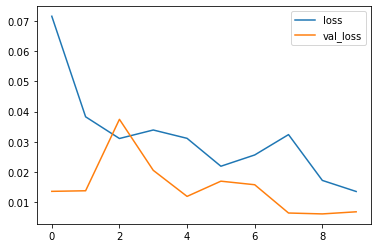

In [54]:
losses = pd.DataFrame(cnn.history.history)
losses[['loss','val_loss']].plot()

<AxesSubplot:>

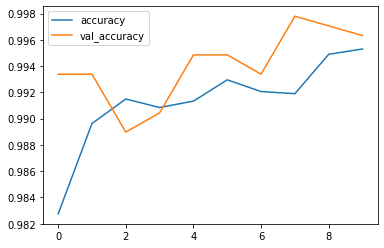

In [57]:
accuracy = pd.DataFrame(cnn.history.history)
accuracy[['accuracy','val_accuracy']].plot()

In [8]:
from tensorflow.keras.models import load_model
cnn=load_model(r'I:\Deep Learning data\archive_6\Training Data\models\fire_and_smoke_model.h5')

In [9]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)       147712    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)           

In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [17]:
image_for_testing=r'I:\Deep Learning data\archive_6\Training Data\Smoke\000003.jpg'

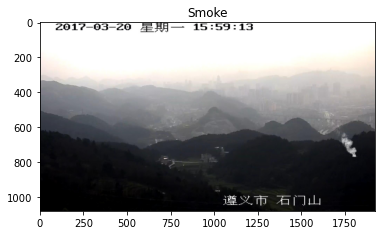

In [18]:
test_image=image.load_img(image_for_testing,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)

Catagories=['Fire','Smoke']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()